# Here we'll take the existing Balmer templates I got from Jessie and save them as a binary in the right format for my template function
# There are two templates, the continuum and the high order

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from astropy.io import fits
import os
import glob
from pylab import rcParams
rcParams['figure.figsize'] = 15,8

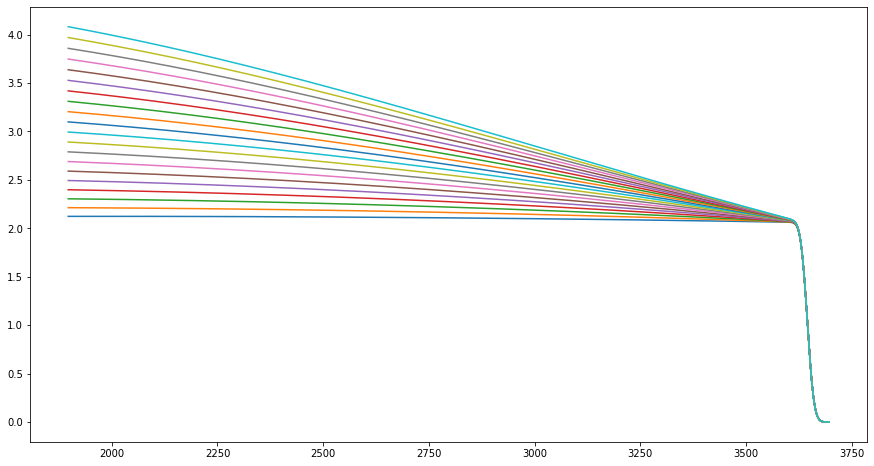

In [3]:
cont_dir='./files/continuum/'
cont_names=['BalC_tau0.1.dat','BalC_tau0.2.dat','BalC_tau0.3.dat','BalC_tau0.4.dat',
            'BalC_tau0.5.dat','BalC_tau0.6.dat','BalC_tau0.7.dat','BalC_tau0.8.dat',
            'BalC_tau0.9.dat','BalC_tau1.0.dat','BalC_tau1.1.dat','BalC_tau1.2.dat',
            'BalC_tau1.3.dat','BalC_tau1.4.dat','BalC_tau1.5.dat','BalC_tau1.6.dat',
            'BalC_tau1.7.dat','BalC_tau1.8.dat','BalC_tau1.9.dat','BalC_tau2.0.dat']

# do all of these templates have the same wavelength bins?
# Yes, see cell below
waves=[]


data=np.loadtxt(cont_dir+cont_names[0])
wave=data[:,0]
numpoints=len(wave)
num_templates=len(cont_names)
cont_template=np.zeros(shape=(numpoints,num_templates+1))
cont_template[:,0]=wave

for i in range(len(cont_names)):
    data=np.loadtxt(cont_dir+cont_names[i])
    wave=data[:,0]
    waves.append(wave)
    flux=data[:,1]
    cont_template[:,i+1]=flux
    
    plt.plot(wave,flux)
plt.show()

np.save('./files/balmer_cont_templates.npy',cont_template)




In [4]:
for i in range(len(waves)-1):
    
    match=np.array_equal(waves[i],waves[i+1])
    
    if not match:
        print("Two wavelength arrays don't match!")

In [5]:
# Now handle the higher order Balmer lines

high_dir='./files/high_order/'
high_names=['BalHiOrd_FWHM1000.dat','BalHiOrd_FWHM1500.dat','BalHiOrd_FWHM2000.dat','BalHiOrd_FWHM2500.dat',
            'BalHiOrd_FWHM3000.dat','BalHiOrd_FWHM3500.dat','BalHiOrd_FWHM4000.dat','BalHiOrd_FWHM4500.dat',
            'BalHiOrd_FWHM5000.dat','BalHiOrd_FWHM5500.dat','BalHiOrd_FWHM6000.dat','BalHiOrd_FWHM6500.dat',
            'BalHiOrd_FWHM7000.dat','BalHiOrd_FWHM7500.dat','BalHiOrd_FWHM8000.dat','BalHiOrd_FWHM8500.dat',
            'BalHiOrd_FWHM9000.dat','BalHiOrd_FWHM9500.dat','BalHiOrd_FWHM10000.dat','BalHiOrd_FWHM10500.dat',
            'BalHiOrd_FWHM11000.dat']

# Do all of the templates have the same wavelength bins?

waves=[]
for i in range(len(high_names)):
    data=np.loadtxt(high_dir+high_names[i])
    waves.append(data[:,0])
    
for i in range(len(waves)-1):
    match=np.array_equal(waves[i],waves[i+1])
    
    if not match:
        print('Two of the wavelength arrays dont match')
        
# Ok they do all match

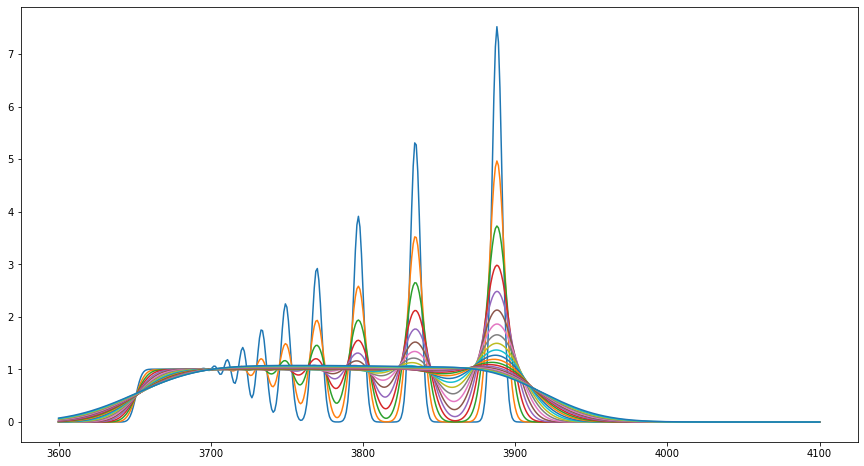

In [6]:
wave=np.loadtxt(high_dir+high_names[0])[:,0]
numpoints=len(wave)
num_templates=len(high_names)
high_template=np.zeros(shape=(numpoints,num_templates+1))
high_template[:,0]=wave

for i in range(len(high_names)):
    
    data=np.loadtxt(high_dir+high_names[i])
    flux=data[:,1]
    high_template[:,i+1]=flux
    
    plt.plot(wave,flux)
    
plt.show()
np.save('./files/balmer_highorder_templates.npy',high_template)